# GATHERING DATA

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import requests
import os
# from bs4 import BeautifulSoup  
import json
from sqlalchemy import create_engine
import re

In [2]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
url = " https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
respons = requests.get(url)

with open('image-predictions.tsv', 'wb') as file:
    file.write(respons.content)

In [4]:
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
respons = requests.get(url)

with open('tweet_json.txt', 'wb') as file:
    file.write(respons.content)

In [5]:
with open('tweet_json.txt', 'r') as f:
    print(json.loads(f.readline()))

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [6]:
image_preidiction = pd.read_csv('image-predictions.tsv', sep='\t')

In [7]:
image_preidiction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [8]:
df_list = []
json_errors = []

with open('tweet_json.txt', 'r') as f:
    
    for x in f:
        try: 
            timestampe = json.loads(x)['created_at']
            tweet_id = json.loads(x)['id']
            tweet_text = json.loads(x)['full_text']
            tweet_image_url = json.loads(x)['extended_entities']['media'][0]['expanded_url']
            source = json.loads(x)['source']
            retweet_count = json.loads(x)['retweet_count']
            favorite_count = json.loads(x)['favorite_count']
            follwers_count = json.loads(x)['user']['followers_count']
            
            dict = {
                'timestampe': timestampe,
                'tweet_id': tweet_id,
                'tweet_text': tweet_text,
                'tweet_image_url': tweet_image_url,
                'source': source,
                'retweet_count': retweet_count,
                'favorite_count': favorite_count,
                'follwers_count': follwers_count
            }
            
            df_list.append(dict)
          
        except:
            #json_errors.append(json.loads(x))
            timestampe = json.loads(x)['created_at']
            tweet_id = json.loads(x)['id']
            tweet_text = json.loads(x)['full_text']
            tweet_image_url = np.nan
            source = json.loads(x)['source']
            retweet_count = json.loads(x)['retweet_count']
            favorite_count = json.loads(x)['favorite_count']
            follwers_count = json.loads(x)['user']['followers_count']
            
            dict = {
                'timestampe': timestampe,
                'tweet_id': tweet_id,
                'tweet_text': tweet_text,
                'tweet_image_url': tweet_image_url,
                'source': source,
                'retweet_count': retweet_count,
                'favorite_count': favorite_count,
                'follwers_count': follwers_count
            }
    
            df_list.append(dict)

In [9]:
# for x in json_errors:
    
#     timestampe = x['created_at']
#     tweet_id = x['id']
#     tweet_text = x['full_text']
#     tweet_image_url = 'NAN'
#     source = x['source']
#     retweet_count = x['retweet_count']
#     favorite_count = x['favorite_count']
#     follwers_count = x['user']['followers_count']
    
#     dict = {
#                 'timestampe': timestampe,
#                 'tweet_id': tweet_id,
#                 'tweet_text': tweet_text,
#                 'tweet_image_url': tweet_image_url,
#                 'source': source,
#                 'retweet_count': retweet_count,
#                 'favorite_count': favorite_count,
#                 'follwers_count': follwers_count
#             }
    
#     df_list.append(dict)
    

In [10]:
len(df_list)

2354

In [11]:
weRateDog_df = pd.DataFrame(df_list, columns=['timestampe', 'tweet_id', 'tweet_text', 'tweet_image_url', 'source', 'retweet_count',
                                   'favorite_count', 'follwers_count'])

In [12]:
weRateDog_df.head()

,timestampe,tweet_id,tweet_text,tweet_image_url,source,retweet_count,favorite_count,follwers_count
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,"<a href=""http://twitter.com/download/iphone"" r...",8853,39467,3200889
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,"<a href=""http://twitter.com/download/iphone"" r...",6514,33819,3200889
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,"<a href=""http://twitter.com/download/iphone"" r...",4328,25461,3200889
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,"<a href=""http://twitter.com/download/iphone"" r...",8964,42908,3200889
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,"<a href=""http://twitter.com/download/iphone"" r...",9774,41048,3200889


In [13]:
weRateDog_df.to_csv('WeRateDog.csv', index=False)

# Access

In [14]:
weRateDog_df

,timestampe,tweet_id,tweet_text,tweet_image_url,source,retweet_count,favorite_count,follwers_count
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,"<a href=""http://twitter.com/download/iphone"" r...",8853,39467,3200889
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,"<a href=""http://twitter.com/download/iphone"" r...",6514,33819,3200889
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,"<a href=""http://twitter.com/download/iphone"" r...",4328,25461,3200889
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,"<a href=""http://twitter.com/download/iphone"" r...",8964,42908,3200889
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,"<a href=""http://twitter.com/download/iphone"" r...",9774,41048,3200889
...,...,...,...,...,...,...,...,...
2349,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,"<a href=""http://twitter.com/download/iphone"" r...",41,111,3201018
2350,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,"<a href=""http://twitter.com/download/iphone"" r...",147,311,3201018
2351,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,"<a href=""http://twitter.com/download/iphone"" r...",47,128,3201018
2352,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,"<a href=""http://twitter.com/download/iphone"" r...",48,132,3201018


In [15]:
weRateDog_df.tweet_text

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
                              ...                        
2349    Here we have a 1949 1st generation vulpix. Enj...
2350    This is a purebred Piers Morgan. Loves to Netf...
2351    Here is a very happy pup. Big fan of well-main...
2352    This is a western brown Mitsubishi terrier. Up...
2353    Here we have a Japanese Irish Setter. Lost eye...
Name: tweet_text, Length: 2354, dtype: object

In [16]:
weRateDog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestampe       2354 non-null   object
 1   tweet_id         2354 non-null   int64 
 2   tweet_text       2354 non-null   object
 3   tweet_image_url  2073 non-null   object
 4   source           2354 non-null   object
 5   retweet_count    2354 non-null   int64 
 6   favorite_count   2354 non-null   int64 
 7   follwers_count   2354 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 147.2+ KB


In [17]:
weRateDog_df.source.head()

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
2    <a href="http://twitter.com/download/iphone" r...
3    <a href="http://twitter.com/download/iphone" r...
4    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [18]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [19]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
image_preidiction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [21]:
image_preidiction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
weRateDog_df_copy = weRateDog_df.copy()
image_preidiction_copy = image_preidiction.copy()
twitter_archive_enhanced_copy = twitter_archive_enhanced.copy()

### Quality Issues 

#### weRateDog_df Data Frame
- invalid time format for timestamp column 
- time tweeted in time stamp 
- day of the week in timestampe  
- ratting of dogs in tweet text 
- extra URL links for images in text
- dog stage in tweet text  
- invalid format for source column 
- inaccurate timestampe columns data type
- inaccurate dog rating data type

#### twitter_archive_enhanced Data Frame
- invalid format for source column
- invalid time format for timestamp column 

### Tidiness Issues

#### weRateDog_df Data Frame
- separate columns for tweet and retweet in weRateDog_df Data Frame
- names of dog in tweet text

#### twitter_archive_enhanced Data Frame
- dog stage in separate columns in twitter_archive_enhanced Data Frame

#### image_preidiction Data Frame 
- correct prediction of dog type in multiple tables in image_preidiction Data Frame 

# Clean

#### Define
- **Create a sepreate columns for days of the week using `appy()` and `.split()` mathods to target the first index**
- **append the new columns to the weRatedog data frame**
- **replace abrivation of day with full naem**

#### Code

In [23]:
weRateDog_df_copy.timestampe.head()

0    Tue Aug 01 16:23:56 +0000 2017
1    Tue Aug 01 00:17:27 +0000 2017
2    Mon Jul 31 00:18:03 +0000 2017
3    Sun Jul 30 15:58:51 +0000 2017
4    Sat Jul 29 16:00:24 +0000 2017
Name: timestampe, dtype: object

In [24]:
day_tweeted = weRateDog_df_copy.timestampe.apply(lambda x: x.split()[0])

In [25]:
weRateDog_df_copy['day_tweeted'] = day_tweeted.astype(str)

In [26]:
days_abv_correction = [('sunday', 'Sun'), ('saturday', 'Sat'), ('monday', 'Mon'),
                       ('tuesday', 'Tue'), ('Thursday', 'Thu'), ('wednessday', 'Wed'), ('friday', 'Fri')]

for days in days_abv_correction:
    weRateDog_df_copy['day_tweeted'].replace(days[1], days[0], inplace=True)

#### Test

In [27]:
weRateDog_df_copy.head(3)

,timestampe,tweet_id,tweet_text,tweet_image_url,source,retweet_count,favorite_count,follwers_count,day_tweeted
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,"<a href=""http://twitter.com/download/iphone"" r...",8853,39467,3200889,tuesday
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,"<a href=""http://twitter.com/download/iphone"" r...",6514,33819,3200889,tuesday
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,"<a href=""http://twitter.com/download/iphone"" r...",4328,25461,3200889,monday


#### Define 
- **Create seperate columns for the time tweeted using `apply()` mathod and `split()` function to on timestamp columns** 
- **append the new columns to the weRatedog data frame**

#### Code

In [28]:
time_tweeted = weRateDog_df_copy.timestampe.apply(lambda x: x.split()[3])

In [29]:
weRateDog_df_copy['time_tweeted'] = time_tweeted

#### Test

In [30]:
weRateDog_df_copy.head()

,timestampe,tweet_id,tweet_text,tweet_image_url,source,retweet_count,favorite_count,follwers_count,day_tweeted,time_tweeted
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,"<a href=""http://twitter.com/download/iphone"" r...",8853,39467,3200889,tuesday,16:23:56
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,"<a href=""http://twitter.com/download/iphone"" r...",6514,33819,3200889,tuesday,00:17:27
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,"<a href=""http://twitter.com/download/iphone"" r...",4328,25461,3200889,monday,00:18:03
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,"<a href=""http://twitter.com/download/iphone"" r...",8964,42908,3200889,sunday,15:58:51
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,"<a href=""http://twitter.com/download/iphone"" r...",9774,41048,3200889,saturday,16:00:24


#### Define
- **Change The invalide timestampe columns formate to [`yyyy-mm-dd`] using `apply()` mathod for iterating throug the timestampe columns**
- **using the `split()` string function to convet each valuse to list**
- **converting the the arrary to numpy array by `np.array` and target the index of the numpy array using `np.r_[]`**
- **join the array by `-` using `join()` string function**
- **add coulmn to weRatedog dataframe  and delete `timestampe` column** 

#### Code

In [31]:
date_tweeted = weRateDog_df_copy.timestampe.apply(lambda x: "-".join(np.array(x.split())[np.r_[5,1,2]]))

In [32]:
weRateDog_df_copy['date_tweeted'] = date_tweeted
weRateDog_df_copy = weRateDog_df_copy.drop(columns=['timestampe'])

#### Test

In [33]:
weRateDog_df_copy.head()

,tweet_id,tweet_text,tweet_image_url,source,retweet_count,favorite_count,follwers_count,day_tweeted,time_tweeted,date_tweeted
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,"<a href=""http://twitter.com/download/iphone"" r...",8853,39467,3200889,tuesday,16:23:56,2017-Aug-01
1,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,"<a href=""http://twitter.com/download/iphone"" r...",6514,33819,3200889,tuesday,00:17:27,2017-Aug-01
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,"<a href=""http://twitter.com/download/iphone"" r...",4328,25461,3200889,monday,00:18:03,2017-Jul-31
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,"<a href=""http://twitter.com/download/iphone"" r...",8964,42908,3200889,sunday,15:58:51,2017-Jul-30
4,891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,"<a href=""http://twitter.com/download/iphone"" r...",9774,41048,3200889,saturday,16:00:24,2017-Jul-29


#### Define
- **targetting ratting of dogs in tweet text using `apply()` function and regular expression `re` for extraction**
- **create seperate columns for numeratore and denominatore**

#### Code

In [34]:
# rate_valuse = weRateDog_df.tweet_text.str.extract(r'([0-9]?[0-9]?[1234567890]?[.]?./[0-9]+)').sample(50).astype(str)
# tweeter_ratings = 

numeratore = weRateDog_df_copy.tweet_text.apply(lambda x: re.findall(r'\b\d+\b', x)[0])
denominatore = weRateDog_df_copy.tweet_text.apply(lambda x: re.findall(r'\b\d+\b', x)[-1])

In [35]:
weRateDog_df_copy['dog_ratings_numeratore'] = numeratore
weRateDog_df_copy['dog_ratings_denominatore'] = denominatore

#### Test

In [36]:
weRateDog_df_copy.head()

,tweet_id,tweet_text,tweet_image_url,source,retweet_count,favorite_count,follwers_count,day_tweeted,time_tweeted,date_tweeted,dog_ratings_numeratore,dog_ratings_denominatore
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,"<a href=""http://twitter.com/download/iphone"" r...",8853,39467,3200889,tuesday,16:23:56,2017-Aug-01,13,10
1,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,"<a href=""http://twitter.com/download/iphone"" r...",6514,33819,3200889,tuesday,00:17:27,2017-Aug-01,13,10
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,"<a href=""http://twitter.com/download/iphone"" r...",4328,25461,3200889,monday,00:18:03,2017-Jul-31,12,10
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,"<a href=""http://twitter.com/download/iphone"" r...",8964,42908,3200889,sunday,15:58:51,2017-Jul-30,13,10
4,891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,"<a href=""http://twitter.com/download/iphone"" r...",9774,41048,3200889,saturday,16:00:24,2017-Jul-29,12,10


#### Define
- **extre url links for imagse in text using `apply()` function and regulare expresion `re`**
- **create a seperate columns for extrar_tweet_url for the extration of url line**

#### Code

In [37]:
tweet_text_url = weRateDog_df_copy.tweet_text.apply(lambda x: ''.join(re.findall(r'(https?://\S+)', x)))
weRateDog_df_copy['tweet_text_url'] = tweet_text_url

In [38]:
tweet_text_url = twitter_archive_enhanced_copy.text.apply(lambda x: ''.join(re.findall(r'(https?://\S+)', x)))
twitter_archive_enhanced_copy['tweet_text_url'] = tweet_text_url

#### Test

In [39]:
weRateDog_df_copy.head()

,tweet_id,tweet_text,tweet_image_url,source,retweet_count,favorite_count,follwers_count,day_tweeted,time_tweeted,date_tweeted,dog_ratings_numeratore,dog_ratings_denominatore,tweet_text_url
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,"<a href=""http://twitter.com/download/iphone"" r...",8853,39467,3200889,tuesday,16:23:56,2017-Aug-01,13,10,https://t.co/MgUWQ76dJU
1,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,"<a href=""http://twitter.com/download/iphone"" r...",6514,33819,3200889,tuesday,00:17:27,2017-Aug-01,13,10,https://t.co/0Xxu71qeIV
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,"<a href=""http://twitter.com/download/iphone"" r...",4328,25461,3200889,monday,00:18:03,2017-Jul-31,12,10,https://t.co/wUnZnhtVJB
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,"<a href=""http://twitter.com/download/iphone"" r...",8964,42908,3200889,sunday,15:58:51,2017-Jul-30,13,10,https://t.co/tD36da7qLQ
4,891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,"<a href=""http://twitter.com/download/iphone"" r...",9774,41048,3200889,saturday,16:00:24,2017-Jul-29,12,10,https://t.co/AtUZn91f7f


In [40]:
twitter_archive_enhanced_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_text_url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,https://t.co/MgUWQ76dJU
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,https://t.co/0Xxu71qeIV
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,https://t.co/wUnZnhtVJB
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,https://t.co/tD36da7qLQ
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,https://t.co/AtUZn91f7f


#### Define
- **exstact dog stage in tweet text using `apply` function to target each valuse text**
- **use list comprehension, `.join()` function and `strip()`**
- **fill empty cell with a dog stage use for any dog called `floof`**

#### Code

In [41]:
dog_stages = ['doggo', 'pupper', 'puppo', 'floof', 'snoot', 'blep']

dog_stage = weRateDog_df.tweet_text.apply(lambda x: ''.join([dog if dog in x else '' for dog in dog_stages ]).strip( )).head(50)

In [42]:
weRateDog_df_copy['dog_stage'] = dog_stage

In [43]:
weRateDog_df_copy['dog_stage'] = weRateDog_df_copy['dog_stage'].replace('', 'floof')
weRateDog_df_copy['dog_stage'] = weRateDog_df_copy['dog_stage'].fillna('floof')

#### Test

In [44]:
weRateDog_df_copy.head(50)

,tweet_id,tweet_text,tweet_image_url,source,retweet_count,favorite_count,follwers_count,day_tweeted,time_tweeted,date_tweeted,dog_ratings_numeratore,dog_ratings_denominatore,tweet_text_url,dog_stage
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,"<a href=""http://twitter.com/download/iphone"" r...",8853,39467,3200889,tuesday,16:23:56,2017-Aug-01,13,10,https://t.co/MgUWQ76dJU,floof
1,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,"<a href=""http://twitter.com/download/iphone"" r...",6514,33819,3200889,tuesday,00:17:27,2017-Aug-01,13,10,https://t.co/0Xxu71qeIV,floof
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,"<a href=""http://twitter.com/download/iphone"" r...",4328,25461,3200889,monday,00:18:03,2017-Jul-31,12,10,https://t.co/wUnZnhtVJB,floof
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,"<a href=""http://twitter.com/download/iphone"" r...",8964,42908,3200889,sunday,15:58:51,2017-Jul-30,13,10,https://t.co/tD36da7qLQ,floof
4,891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,"<a href=""http://twitter.com/download/iphone"" r...",9774,41048,3200889,saturday,16:00:24,2017-Jul-29,12,10,https://t.co/AtUZn91f7f,floof
5,891087950875897856,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,"<a href=""http://twitter.com/download/iphone"" r...",3261,20562,3200889,saturday,00:08:17,2017-Jul-29,13,10,https://t.co/kQ04fDDRmh,floof
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,https://twitter.com/dog_rates/status/890971913...,"<a href=""http://twitter.com/download/iphone"" r...",2158,12041,3200889,friday,16:27:12,2017-Jul-28,13,10,https://t.co/Zr4hWfAs1Hhttps://t.co/tVJBRMnhxl,floof
7,890729181411237888,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,"<a href=""http://twitter.com/download/iphone"" r...",16716,56848,3200889,friday,00:22:40,2017-Jul-28,13,10,https://t.co/v0nONBcwxq,floof
8,890609185150312448,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,"<a href=""http://twitter.com/download/iphone"" r...",4429,28226,3200889,Thursday,16:25:51,2017-Jul-27,13,10,https://t.co/9TwLuAGH0b,floof
9,890240255349198849,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,"<a href=""http://twitter.com/download/iphone"" r...",7711,32467,3200889,wednessday,15:59:51,2017-Jul-26,14,10,https://t.co/t1bfwz5S2A,doggo


In [45]:
weRateDog_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   tweet_id                  2354 non-null   int64 
 1   tweet_text                2354 non-null   object
 2   tweet_image_url           2073 non-null   object
 3   source                    2354 non-null   object
 4   retweet_count             2354 non-null   int64 
 5   favorite_count            2354 non-null   int64 
 6   follwers_count            2354 non-null   int64 
 7   day_tweeted               2354 non-null   object
 8   time_tweeted              2354 non-null   object
 9   date_tweeted              2354 non-null   object
 10  dog_ratings_numeratore    2354 non-null   object
 11  dog_ratings_denominatore  2354 non-null   object
 12  tweet_text_url            2354 non-null   object
 13  dog_stage                 2354 non-null   object
dtypes: int64(4), object(10)


#### Define
- **exstarct the accual sourse of tweet using apply() method split() function**
- **index througe the split() list and use the replace() function to replace [</a] with empty space**
- **delete source function**

#### Code

In [46]:
twitter_source = weRateDog_df_copy.source.apply(lambda x: x.split('>')[1].replace('</a', ''))

twitter_source_enhanced = twitter_archive_enhanced_copy.source.apply(lambda x: x.split('>')[1].replace('</a', ''))

In [47]:
weRateDog_df_copy['twitter_source'] = twitter_source

twitter_archive_enhanced_copy['twitter_source_enhanced'] = twitter_source_enhanced

In [48]:
weRateDog_df_copy = weRateDog_df_copy.drop(columns='source')

twitter_archive_enhanced_copy = twitter_archive_enhanced_copy.drop(columns='source')

#### Test

In [49]:
weRateDog_df_copy.head()

,tweet_id,tweet_text,tweet_image_url,retweet_count,favorite_count,follwers_count,day_tweeted,time_tweeted,date_tweeted,dog_ratings_numeratore,dog_ratings_denominatore,tweet_text_url,dog_stage,twitter_source
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,8853,39467,3200889,tuesday,16:23:56,2017-Aug-01,13,10,https://t.co/MgUWQ76dJU,floof,Twitter for iPhone
1,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,6514,33819,3200889,tuesday,00:17:27,2017-Aug-01,13,10,https://t.co/0Xxu71qeIV,floof,Twitter for iPhone
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,4328,25461,3200889,monday,00:18:03,2017-Jul-31,12,10,https://t.co/wUnZnhtVJB,floof,Twitter for iPhone
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,8964,42908,3200889,sunday,15:58:51,2017-Jul-30,13,10,https://t.co/tD36da7qLQ,floof,Twitter for iPhone
4,891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,9774,41048,3200889,saturday,16:00:24,2017-Jul-29,12,10,https://t.co/AtUZn91f7f,floof,Twitter for iPhone


In [50]:
twitter_archive_enhanced_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_text_url,twitter_source_enhanced
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,https://t.co/MgUWQ76dJU,Twitter for iPhone
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,https://t.co/0Xxu71qeIV,Twitter for iPhone
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,https://t.co/wUnZnhtVJB,Twitter for iPhone
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,https://t.co/tD36da7qLQ,Twitter for iPhone
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,https://t.co/AtUZn91f7f,Twitter for iPhone


#### Define
- **Create a columns for that identify retweet and tweet**
- **use `.apply()` to tagert each text**
- **list comprehention and indexing to target results**

#### Code

In [51]:
isRetweet = ['RT']

tweet_type = weRateDog_df_copy.tweet_text.apply(lambda x: ['Retweet' if t in x else 'Tweet' for t in isRetweet][0])

In [52]:
weRateDog_df_copy['tweet_type'] = tweet_type

#### Test

In [53]:
weRateDog_df_copy.head(50)

,tweet_id,tweet_text,tweet_image_url,retweet_count,favorite_count,follwers_count,day_tweeted,time_tweeted,date_tweeted,dog_ratings_numeratore,dog_ratings_denominatore,tweet_text_url,dog_stage,twitter_source,tweet_type
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,8853,39467,3200889,tuesday,16:23:56,2017-Aug-01,13,10,https://t.co/MgUWQ76dJU,floof,Twitter for iPhone,Tweet
1,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,6514,33819,3200889,tuesday,00:17:27,2017-Aug-01,13,10,https://t.co/0Xxu71qeIV,floof,Twitter for iPhone,Tweet
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,4328,25461,3200889,monday,00:18:03,2017-Jul-31,12,10,https://t.co/wUnZnhtVJB,floof,Twitter for iPhone,Tweet
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,8964,42908,3200889,sunday,15:58:51,2017-Jul-30,13,10,https://t.co/tD36da7qLQ,floof,Twitter for iPhone,Tweet
4,891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,9774,41048,3200889,saturday,16:00:24,2017-Jul-29,12,10,https://t.co/AtUZn91f7f,floof,Twitter for iPhone,Tweet
5,891087950875897856,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,3261,20562,3200889,saturday,00:08:17,2017-Jul-29,13,10,https://t.co/kQ04fDDRmh,floof,Twitter for iPhone,Tweet
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,https://twitter.com/dog_rates/status/890971913...,2158,12041,3200889,friday,16:27:12,2017-Jul-28,13,10,https://t.co/Zr4hWfAs1Hhttps://t.co/tVJBRMnhxl,floof,Twitter for iPhone,Tweet
7,890729181411237888,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,16716,56848,3200889,friday,00:22:40,2017-Jul-28,13,10,https://t.co/v0nONBcwxq,floof,Twitter for iPhone,Tweet
8,890609185150312448,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,4429,28226,3200889,Thursday,16:25:51,2017-Jul-27,13,10,https://t.co/9TwLuAGH0b,floof,Twitter for iPhone,Tweet
9,890240255349198849,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,7711,32467,3200889,wednessday,15:59:51,2017-Jul-26,14,10,https://t.co/t1bfwz5S2A,doggo,Twitter for iPhone,Tweet


In [54]:
weRateDog_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   tweet_id                  2354 non-null   int64 
 1   tweet_text                2354 non-null   object
 2   tweet_image_url           2073 non-null   object
 3   retweet_count             2354 non-null   int64 
 4   favorite_count            2354 non-null   int64 
 5   follwers_count            2354 non-null   int64 
 6   day_tweeted               2354 non-null   object
 7   time_tweeted              2354 non-null   object
 8   date_tweeted              2354 non-null   object
 9   dog_ratings_numeratore    2354 non-null   object
 10  dog_ratings_denominatore  2354 non-null   object
 11  tweet_text_url            2354 non-null   object
 12  dog_stage                 2354 non-null   object
 13  twitter_source            2354 non-null   object
 14  tweet_type              

In [55]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Define 
- Convert data_tweeted columns data type from string to time data type using `pd.to_datetime()` method

- Convert `timestamp` columns data type in twitter_archive_enhanced data frame from string to datetime using pandas method `pd.to_datetime()`

#### Code

In [56]:
weRateDog_df_copy['date_tweeted'] = pd.to_datetime(weRateDog_df_copy.date_tweeted)

In [57]:
twitter_archive_enhanced_copy['timestamp'] = pd.to_datetime(twitter_archive_enhanced_copy['timestamp'])

#### Test

In [58]:
weRateDog_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   tweet_id                  2354 non-null   int64         
 1   tweet_text                2354 non-null   object        
 2   tweet_image_url           2073 non-null   object        
 3   retweet_count             2354 non-null   int64         
 4   favorite_count            2354 non-null   int64         
 5   follwers_count            2354 non-null   int64         
 6   day_tweeted               2354 non-null   object        
 7   time_tweeted              2354 non-null   object        
 8   date_tweeted              2354 non-null   datetime64[ns]
 9   dog_ratings_numeratore    2354 non-null   object        
 10  dog_ratings_denominatore  2354 non-null   object        
 11  tweet_text_url            2354 non-null   object        
 12  dog_stage           

In [59]:
twitter_archive_enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   text                        2356 non-null   object             
 5   retweeted_status_id         181 non-null    float64            
 6   retweeted_status_user_id    181 non-null    float64            
 7   retweeted_status_timestamp  181 non-null    object             
 8   expanded_urls               2297 non-null   object             
 9   rating_numerator            2356 non-null   int64              
 10  rating_denominator          2356 non-null   int64           

#### Define
- **Convert dog_ratings_numeratore and dog_ratings_denominatore columns from object to integer using `astype()`**

#### Code

In [60]:
weRateDog_df_copy[['dog_ratings_numeratore', 'dog_ratings_denominatore']] = weRateDog_df_copy[['dog_ratings_numeratore', 'dog_ratings_denominatore']].astype(int)

#### Test

In [61]:
weRateDog_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   tweet_id                  2354 non-null   int64         
 1   tweet_text                2354 non-null   object        
 2   tweet_image_url           2073 non-null   object        
 3   retweet_count             2354 non-null   int64         
 4   favorite_count            2354 non-null   int64         
 5   follwers_count            2354 non-null   int64         
 6   day_tweeted               2354 non-null   object        
 7   time_tweeted              2354 non-null   object        
 8   date_tweeted              2354 non-null   datetime64[ns]
 9   dog_ratings_numeratore    2354 non-null   int32         
 10  dog_ratings_denominatore  2354 non-null   int32         
 11  tweet_text_url            2354 non-null   object        
 12  dog_stage           

### Define
- **Target name of dog columns in  twitter_archive_enhanced_copy**
- **create a new column by joining the name of dogs from twitter_archive_enhanced_copy to weRateDog_df_copy**

#### Code

In [62]:
# name_id_target
# weRateDog_df_copy['dog_names'] = twitter_archive_enhanced_copy.name
weRateDog_df_copy = weRateDog_df_copy.merge(twitter_archive_enhanced_copy[['tweet_id','name']], left_on='tweet_id', right_on='tweet_id')

#### Test

In [63]:
weRateDog_df_copy.head()

,tweet_id,tweet_text,tweet_image_url,retweet_count,favorite_count,follwers_count,day_tweeted,time_tweeted,date_tweeted,dog_ratings_numeratore,dog_ratings_denominatore,tweet_text_url,dog_stage,twitter_source,tweet_type,name
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,8853,39467,3200889,tuesday,16:23:56,2017-08-01,13,10,https://t.co/MgUWQ76dJU,floof,Twitter for iPhone,Tweet,Phineas
1,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,6514,33819,3200889,tuesday,00:17:27,2017-08-01,13,10,https://t.co/0Xxu71qeIV,floof,Twitter for iPhone,Tweet,Tilly
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,4328,25461,3200889,monday,00:18:03,2017-07-31,12,10,https://t.co/wUnZnhtVJB,floof,Twitter for iPhone,Tweet,Archie
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,8964,42908,3200889,sunday,15:58:51,2017-07-30,13,10,https://t.co/tD36da7qLQ,floof,Twitter for iPhone,Tweet,Darla
4,891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,9774,41048,3200889,saturday,16:00:24,2017-07-29,12,10,https://t.co/AtUZn91f7f,floof,Twitter for iPhone,Tweet,Franklin


#### Define
- **join dog stages `doggo`, `floofer`, `pupper`, `puppo` into a single columns**
- **delete all sepert colmns for dog stage**
- **replace all empty cells with a porpular defination for all dogs `floofer`**  

#### Code

In [64]:
twitter_archive_enhanced_copy['stage'] = twitter_archive_enhanced_copy['doggo'] + twitter_archive_enhanced_copy['floofer'] + twitter_archive_enhanced_copy['pupper'] + twitter_archive_enhanced_copy['puppo']

In [65]:
replace_tages = ['NoneNoneNoneNone', 'NoneNoneNone', 'NoneNone', 'None']
for rep in replace_tages:
    twitter_archive_enhanced_copy['stage'] = twitter_archive_enhanced_copy['stage'].apply(lambda x: x.replace(rep, ''))

In [66]:
twitter_archive_enhanced_copy = twitter_archive_enhanced_copy.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])

In [67]:
twitter_archive_enhanced_copy['stage'] = twitter_archive_enhanced_copy['stage'].replace('','floofer')

#### Test

In [68]:
twitter_archive_enhanced_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,tweet_text_url,twitter_source_enhanced,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://t.co/MgUWQ76dJU,Twitter for iPhone,floofer
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://t.co/0Xxu71qeIV,Twitter for iPhone,floofer
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://t.co/wUnZnhtVJB,Twitter for iPhone,floofer
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://t.co/tD36da7qLQ,Twitter for iPhone,floofer
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://t.co/AtUZn91f7f,Twitter for iPhone,floofer


#### Define
- **raname the columns names with `P` and replace them with `prediction`**

#### Code

In [69]:
replace_columns_names = ['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']

for x in replace_columns_names:
    image_preidiction_copy.rename(columns={x: x.replace('p', 'prediction')}, inplace=True)

#### Test

In [70]:
 image_preidiction_copy.head()

,tweet_id,jpg_url,img_num,prediction1,prediction1_conf,prediction1_dog,prediction2,prediction2_conf,prediction2_dog,prediction3,prediction3_conf,prediction3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define
- **create a seperate columns for if tweets or retweet by mergin from weRateDog_df tweet_type columns with image_preidiction on the condition of there tweet_id**

#### Code

In [71]:
tweet_types = weRateDog_df_copy[['tweet_id', 'tweet_type']]

image_preidiction_copy = image_preidiction_copy.merge(tweet_types, left_on='tweet_id', right_on='tweet_id')

#### Test

In [72]:
image_preidiction_copy.head()

,tweet_id,jpg_url,img_num,prediction1,prediction1_conf,prediction1_dog,prediction2,prediction2_conf,prediction2_dog,prediction3,prediction3_conf,prediction3_dog,tweet_type
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Tweet
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,Tweet
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,Tweet
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Tweet
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,Tweet


In [73]:
weRateDog_df_copy.to_csv('twitter_archive_master.csv')

In [74]:
if not os.path.exists('twitter_archive_master.db'): 
    engine = create_engine('sqlite:///twitter_archive_master.db')
    weRateDog_df_copy.to_sql('master', engine, index=False)

# Explore Data Analysis

### WHAT TYPE OF DOG STAGE HAS MORE LIKES ON AVERAGE

In [75]:
weRateDog_df_copy.groupby('dog_stage')['favorite_count'].mean()

dog_stage
doggo     26619.000000
floof      8034.394378
pupper    25213.500000
puppo     27088.500000
Name: favorite_count, dtype: float64

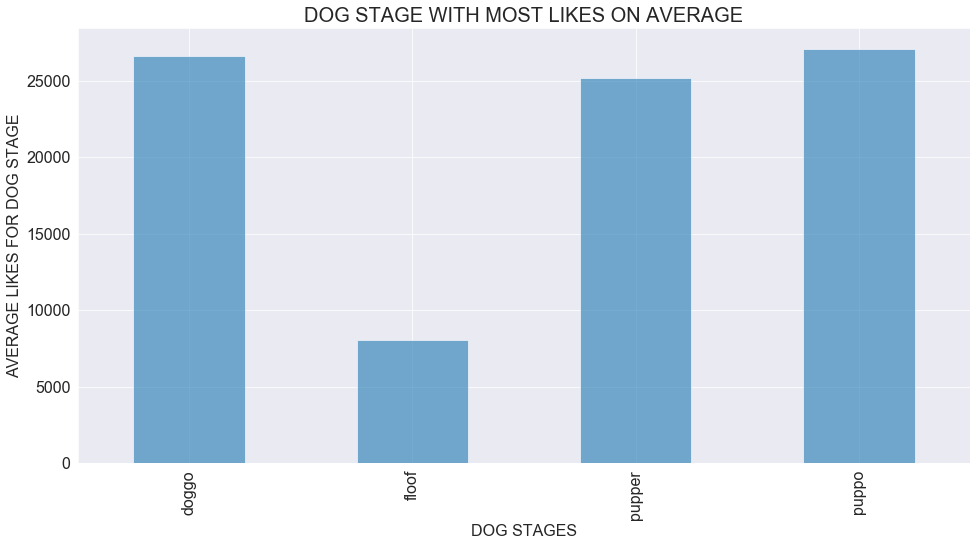

In [76]:
weRateDog_df_copy.groupby('dog_stage')['favorite_count'].mean().plot(kind='bar', alpha=.6,figsize=(16,8), fontsize=16);
plt.title('DOG STAGE WITH MOST LIKES ON AVERAGE', fontsize=20)
plt.xlabel('DOG STAGES', fontsize=16)
plt.ylabel('AVERAGE LIKES FOR DOG STAGE', fontsize=16);

### WHAT TYPEP OF DOG STAGE HAS THE HEIGHEST NUMERATORE RATTINGS ON AVERAGE 

In [77]:
weRateDog_df_copy.groupby('dog_stage')['dog_ratings_numeratore'].mean()

dog_stage
doggo     13.000000
floof     18.529387
pupper    12.000000
puppo     13.000000
Name: dog_ratings_numeratore, dtype: float64

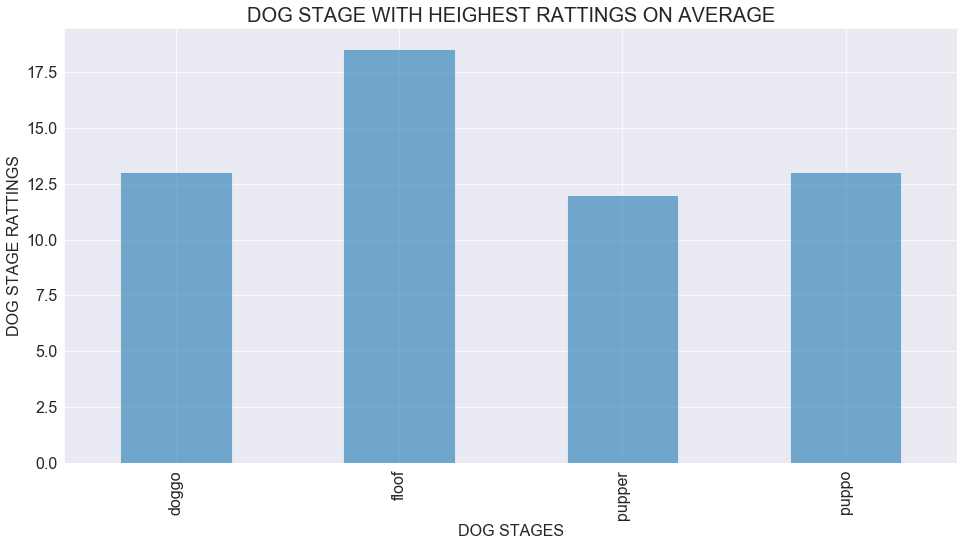

In [78]:
weRateDog_df_copy.groupby('dog_stage')['dog_ratings_numeratore'].mean().plot(kind='bar',alpha=.6,figsize=(16,8), fontsize=16);
plt.title('DOG STAGE WITH HEIGHEST RATTINGS ON AVERAGE', fontsize=20)
plt.xlabel('DOG STAGES', fontsize=16)
plt.ylabel('DOG STAGE RATTINGS', fontsize=16);

### WHAT DAY OF THE WEEK HAS MORE TWEETS OVER THE YEARS

In [79]:
weRateDog_df_copy.groupby('day_tweeted').count()['tweet_type']

day_tweeted
Thursday      326
friday        332
monday        384
saturday      309
sunday        294
tuesday       356
wednessday    353
Name: tweet_type, dtype: int64

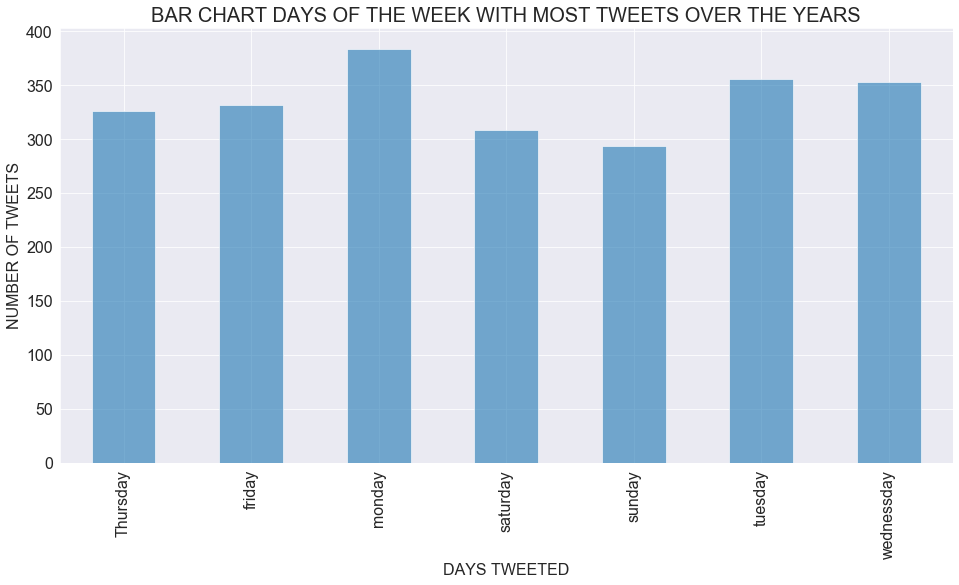

In [80]:
weRateDog_df_copy.groupby('day_tweeted').count()['tweet_type'].plot(kind='bar', alpha=.6,figsize=(16,8), fontsize=16); 
plt.title('BAR CHART DAYS OF THE WEEK WITH MOST TWEETS OVER THE YEARS', fontsize=20)
plt.xlabel('DAYS TWEETED', fontsize=16)
plt.ylabel('NUMBER OF TWEETS', fontsize=16);

### WHICH DOG STAGE ON AVERAGE HAS THE MOST LIKES IN EACH YEAR

In [81]:
year_tweeted = weRateDog_df_copy['date_tweeted'].apply(lambda x: str(x).split('-')[0]) 

weRateDog_df_copy['year_tweeted'] = year_tweeted.astype(int)

dogStageYear = weRateDog_df_copy.groupby(['year_tweeted', 'dog_stage'], as_index=False).mean().iloc[np.r_[0:2, 4], np.r_[0, 1, 4]]

dogStageYear

,year_tweeted,dog_stage,favorite_count
0,2015,floof,2519.078261
1,2016,floof,6997.131134
4,2017,pupper,25213.500000


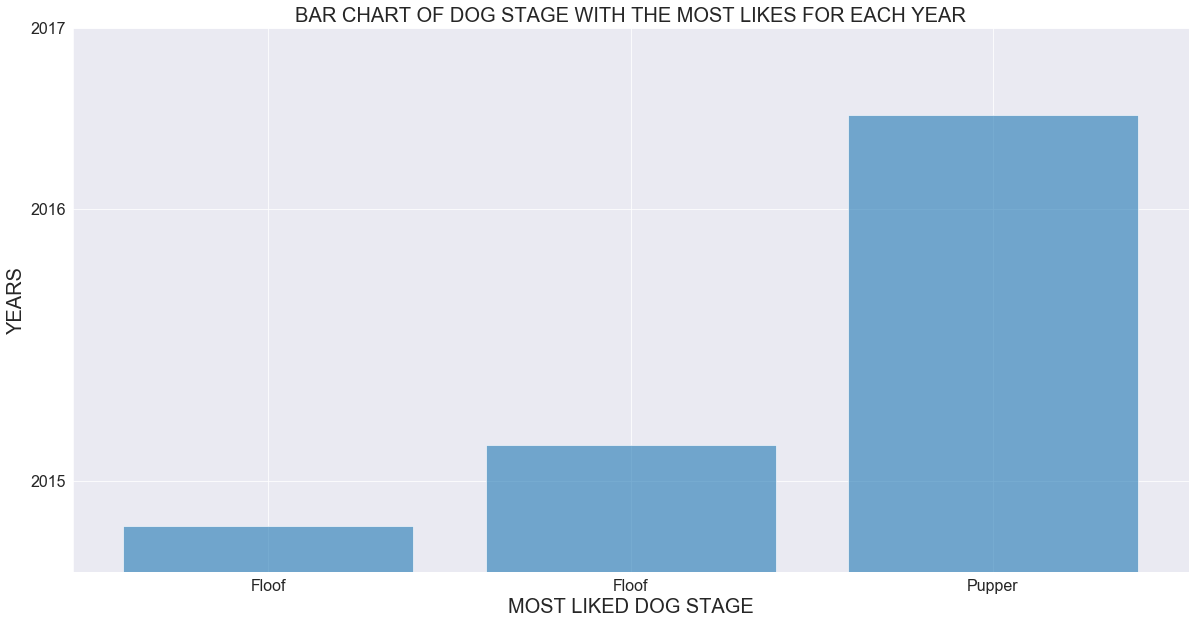

In [82]:
y = dogStageYear['favorite_count']
x = range(3)
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
plt.bar(x, y, alpha=.6)
plt.title('BAR CHART OF DOG STAGE WITH THE MOST LIKES FOR EACH YEAR', fontsize=20)
plt.xlabel('MOST LIKED DOG STAGE', fontsize=20)
plt.ylabel('YEARS', fontsize=20)
X_location = [0.0, 1.0, 2.0]
X_label = ['Floof', 'Floof', 'Pupper']
plt.xticks(X_location, X_label)
y_loc = [30000, 20000, 5000]
y_label = [2017, 2016, 2015]
plt.yticks(y_loc, y_label);

### NUMBER OF RETWEET VAS TWEET OVER THE YEARS

In [83]:
Retweet = weRateDog_df_copy.groupby(['tweet_type', 'year_tweeted'], as_index=False).count().query('tweet_type == "Retweet"').iloc[:, np.r_[0:2, 3]]
Retweet

,tweet_type,year_tweeted,tweet_text
0,Retweet,2015,5
1,Retweet,2016,101
2,Retweet,2017,84


In [84]:
Tweet = weRateDog_df_copy.groupby(['tweet_type', 'year_tweeted'], as_index=False).count().query('tweet_type == "Tweet"').iloc[:, np.r_[0:2, 3]]
Tweet

,tweet_type,year_tweeted,tweet_text
3,Tweet,2015,685
4,Tweet,2016,1081
5,Tweet,2017,398


### WHAT PERCENTAGE OF TWEETED PICTURES THAT WAS ACCUALY DOG AND WHAT PERCENATGE OF TWEETED PICTURS THAT WERE NOT ACCUALLY DOGS?

In [85]:
pred_1 = (image_preidiction_copy.query('tweet_type == "Tweet"').groupby('prediction1_dog').count()['prediction1'] / image_preidiction_copy.shape[0])*100
pred_1

prediction1_dog
False    24.891462
True     70.911722
Name: prediction1, dtype: float64

In [86]:
pred_2 = (image_preidiction_copy.query('tweet_type == "Tweet"').groupby('prediction2_dog').count()['prediction2'] / image_preidiction_copy.shape[0])*100
pred_2 

prediction2_dog
False    24.023155
True     71.780029
Name: prediction2, dtype: float64

In [87]:
pred_3 = (image_preidiction_copy.query('tweet_type == "Tweet"').groupby('prediction3_dog').count()['prediction3'] / image_preidiction_copy.shape[0])*100
pred_3

prediction3_dog
False    26.435118
True     69.368066
Name: prediction3, dtype: float64

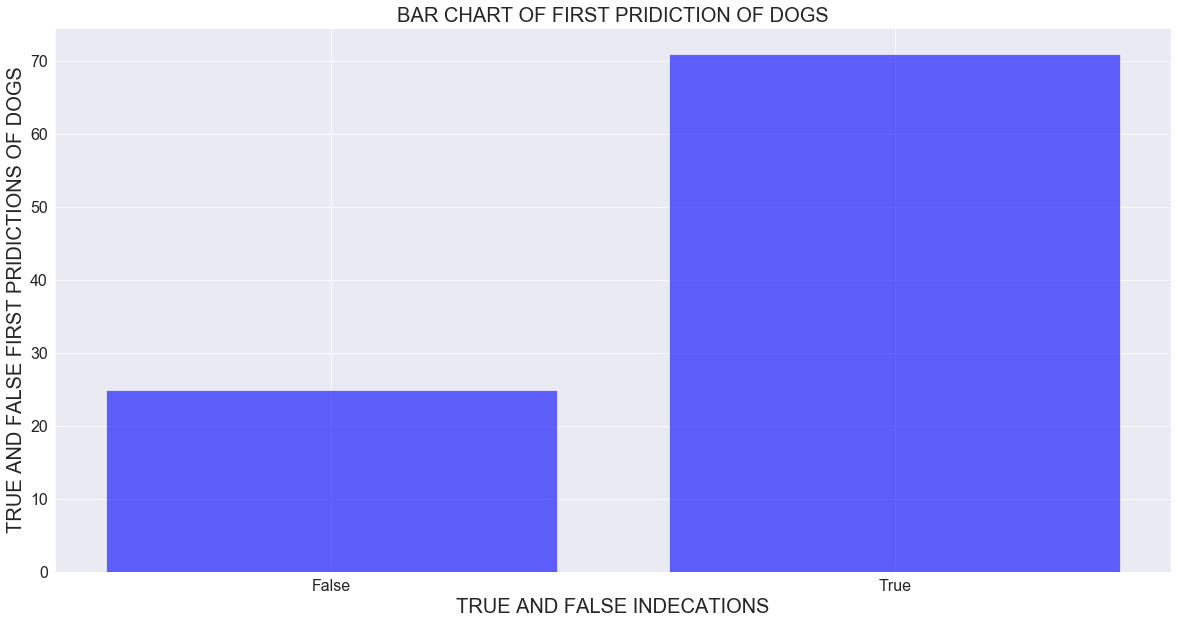

In [88]:
x_01 = list(pred_1)
y = [1, 2]
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
plt.bar(y, x_01, alpha=0.6, color='b')
plt.title('BAR CHART OF FIRST PRIDICTION OF DOGS', fontsize=20)
plt.xlabel('TRUE AND FALSE INDECATIONS', fontsize=20)
plt.ylabel('TRUE AND FALSE FIRST PRIDICTIONS OF DOGS', fontsize=20)
loc = [2.00, 1.00]
lab = ['True', 'False']
plt.xticks(loc, lab);

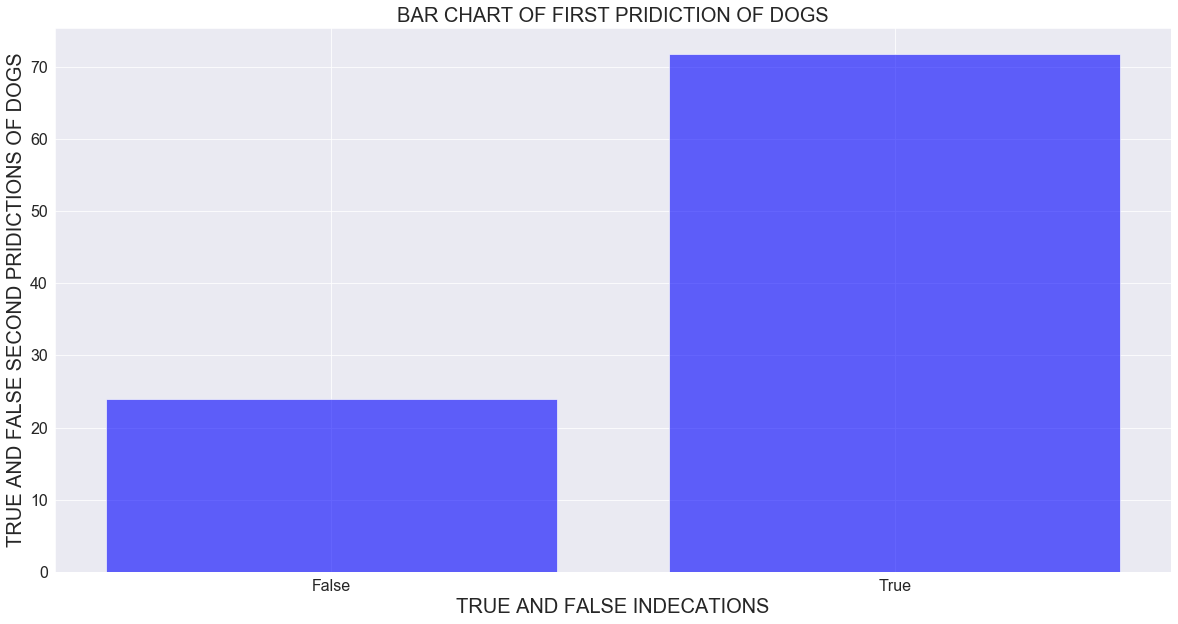

In [89]:
x_02 = list(pred_2)
y = [1, 2]
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
plt.bar(y, x_02, alpha=0.6, color='b')
plt.title('BAR CHART OF FIRST PRIDICTION OF DOGS', fontsize=20)
plt.xlabel('TRUE AND FALSE INDECATIONS', fontsize=20)
plt.ylabel('TRUE AND FALSE SECOND PRIDICTIONS OF DOGS', fontsize=20)
loc = [2.00, 1.00]
lab = ['True', 'False']
plt.xticks(loc, lab);

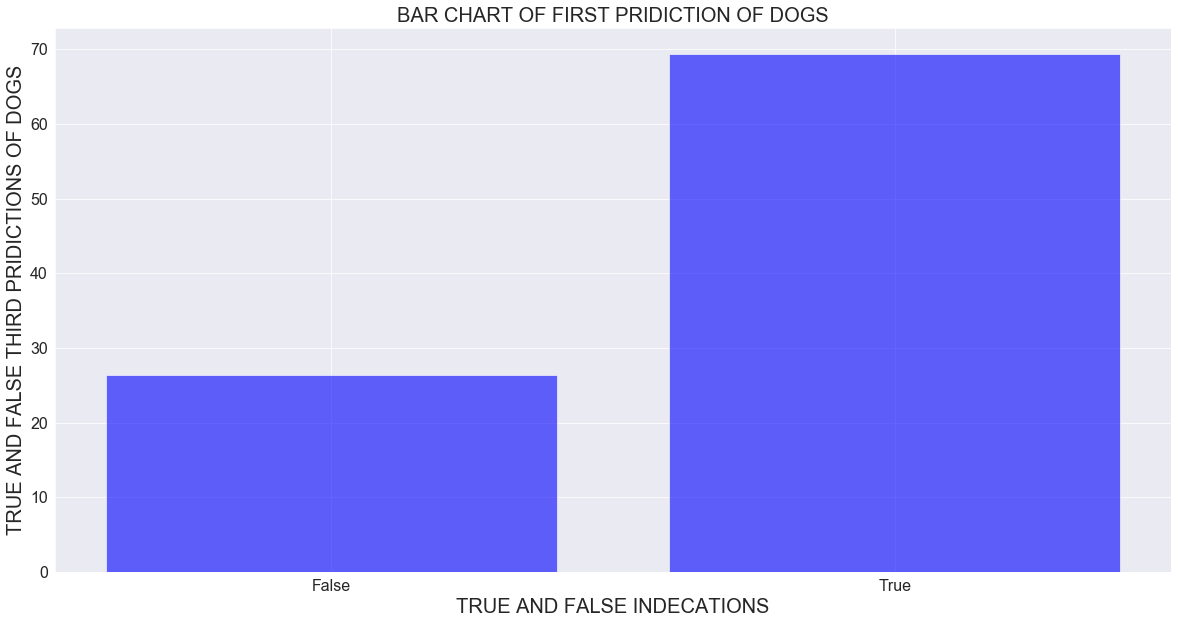

In [90]:
y = [1, 2]
x_03 = list(pred_3)
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
plt.bar(y, x_03, alpha=0.6, color='b')
plt.title('BAR CHART OF FIRST PRIDICTION OF DOGS', fontsize=20)
plt.xlabel('TRUE AND FALSE INDECATIONS', fontsize=20)
plt.ylabel('TRUE AND FALSE THIRD PRIDICTIONS OF DOGS', fontsize=20)
loc = [2.00, 1.00]
lab = ['True', 'False']
plt.xticks(loc, lab);